In [ ]:
"""we importing necessary libraries
Data handling: pandas
Data visualization: matplotlib, seaborn
Machine learning: scikit-learn"""

'we importing necessary libraries\nData handling: pandas\nData visualization: matplotlib, seaborn\nMachine learning: scikit-learn'

In [ ]:
# Step 2 : import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')




In [ ]:
# Step 3 : Loading the Titanic Dataset

In [ ]:
import pandas as pd
df =pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 4 : Data Exploration and Cleaning

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Display the unique values in the 'Survived' column (i.e., target classes: 0 = Not Survived, 1 = Survived)
print(df['Survived'].unique())

[0 1]


In [ ]:
#Get statistical summary (mean, std, min, max, etc.) for numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# Show the data types of each column
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Count the number of missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# This data is not clean so we Handling Missing Values

In [ ]:
# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
# Fill missing values in "Embarked" column with the most frequent (mode) value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
# Drop the "Cabin" column as it contains too many misssing values to be useful
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Encoding the 'sex' column : converts'male' and 'female' to 0 and 1
df['Sex'] = le.fit_transform(df['Sex'])
#Encoding the 'Embarked' column :converts into numerical values
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
# Step 5 : Exploratory Data Analysis (EDA)

In [ ]:
# Visualization help understan relationship between survival and other features.
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# plot 1 : Bar chart of survival count

Text(0, 0.5, 'Count')

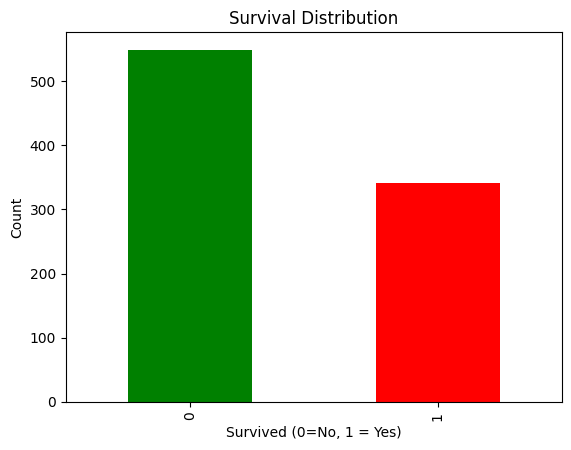

In [ ]:
# count the number of passengers who survived vs did not survive
df['Survived'].value_counts().plot(kind='bar',color=['green','red'])
#Add Titles and labels
plt.title("Survival Distribution")
plt.xlabel("Survived (0=No, 1 = Yes)")
plt.ylabel("Count")

In [ ]:
# Plot 2 : Survival count by gender

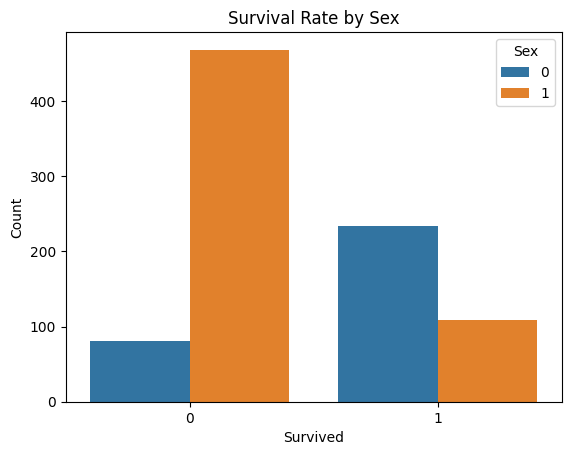

In [ ]:
# Countplot with hue by 'Sex' to show male vs female survival
sns.countplot(data=df,x='Survived',hue='Sex')
plt.title('Survival Rate by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex',loc='upper right')

In [ ]:
# Plot 3: Age Distribution

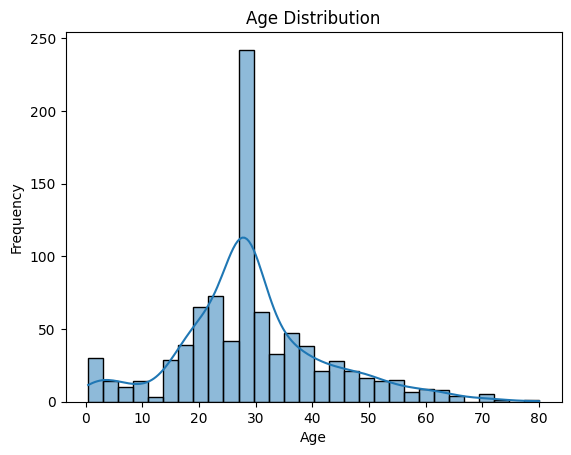

In [ ]:
# Histogram of age with KDE ( Kernel Density Estimate )
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# plot 4 : Survival rate by passenger class

Text(0, 0.5, 'Survival Rate')

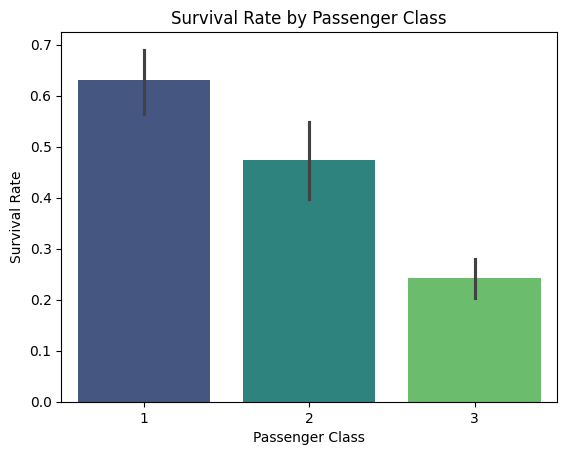

In [ ]:
# Bar plot showing average survival rate for each passenger class
sns.barplot(x="Pclass",y="Survived",data=df,palette="viridis")
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [ ]:
# Plot 5 : Age vs Fare Scatterplot colored by survival

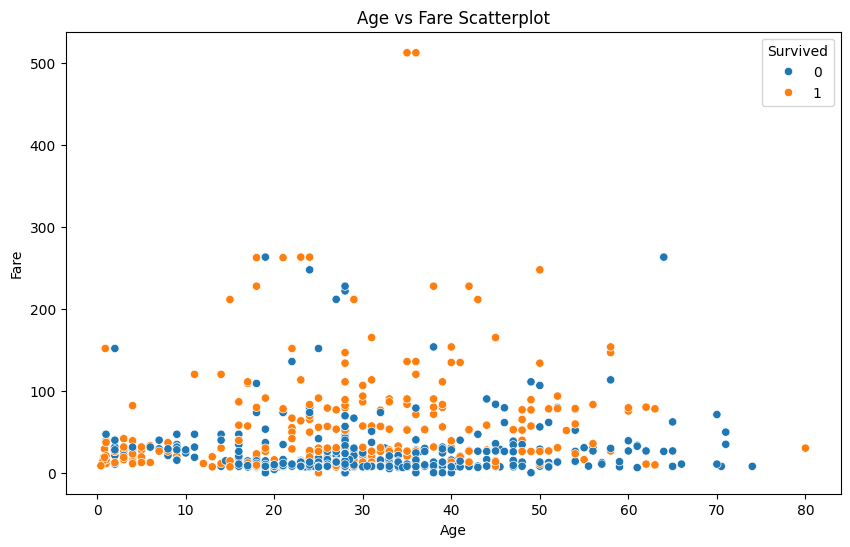

In [ ]:
# Scatter plot to visualize relationship between Age and Fare,colored by survival
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)
plt.title('Age vs Fare Scatterplot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
# Plot 6 : Correlation heatmap


In [ ]:
# select numeric columns only
numeric = df.select_dtypes(include=[np.number])

In [ ]:
#Compute correlation matrix

In [ ]:
corr_matrix = numeric.corr()

In [ ]:
# Plot heatmap of correlation matrix

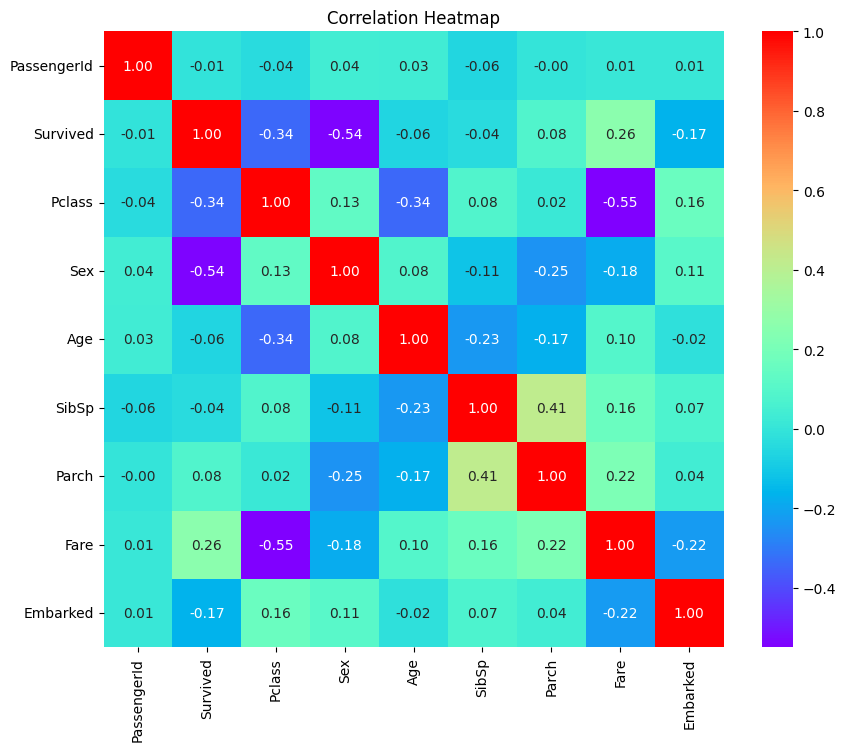

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 6 : Data Preprocessing

In [ ]:
# Splitting the Dataset
#We split data into training (80%) and testing (20%) sets.

In [ ]:
# Splitting the dataset into training and testing sets
# X contains the input features and y contains the target (Survived column)
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures reproducibility of the split (same split every time you run the code)

# Drop non-numeric columns 'Name' and 'Ticket' and the 'PassengerId' before splitting
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7 : Feature Scaling

In [ ]:
# Import StandardScaler from sklearn if not already imported
# from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform it
# This step computes the mean and standard deviation from X_train and applies the scaling
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler (do not fit again to avoid data leakage)
# This ensures that X_test is scaled using the mean and standard deviation of X_train
X_test = scaler.transform(X_test)

In [ ]:
# Step 8: Model Training & Evaluation
# We train the models and evaluate their performance.

In [ ]:
# 1. Logistic Regression with Cross-Validation
log_reg = LogisticRegression()  # Automatically performs cross-validation to find optimal hyperparameters
log_reg.fit(X_train, y_train)  # Train the model on training data
y_pred_log_reg = log_reg.predict(X_test)  # Predict on test set

In [ ]:
# Evaluate performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

In [ ]:
# Print results
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print('Confusion Matrix:')
print(conf_matrix_log_reg)

Logistic Regression Accuracy: 0.80
Confusion Matrix:
[[90 15]
 [20 54]]


In [ ]:
print('Classification Report:')
print(class_report_log_reg)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# 2. Decision Tree Classifier
tree_clf = DecisionTreeClassifier()  # Initialize decision tree
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

In [ ]:
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
print('Confusion Matrix:')
print(conf_matrix_tree)
print('Classification Report:')
print(class_report_tree)

Decision Tree Accuracy: 0.76
Confusion Matrix:
[[80 25]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.69      0.76      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
# 4. Support Vector Machine (SVM)
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')  # One-vs-One classification
clf.fit(X_test, y_test)  # NOTE: This should be X_train, y_train to prevent data leakage
y_pred_clf = clf.predict(X_test)

In [ ]:
accuracy_clf = accuracy_score(y_test, y_pred_clf)
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
class_report_clf = classification_report(y_test, y_pred_clf)

In [ ]:
print(f'SVM Accuracy: {accuracy_clf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_clf)
print('Classification Report:')
print(class_report_clf)

SVM Accuracy: 0.83
Confusion Matrix:
[[93 12]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# 5. Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
classify = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)  # Hinge loss = linear SVM, very low max_iter
classify.fit(X_test, y_test)  # NOTE: Should be X_train, y_train
y_pred_classify = classify.predict(X_test)

In [ ]:
accuracy_classify = accuracy_score(y_test, y_pred_classify)
conf_matrix_classify = confusion_matrix(y_test, y_pred_classify)
class_report_classify = classification_report(y_test, y_pred_classify)

In [ ]:
print(f'SGD Accuracy: {accuracy_classify:.2f}')
print('Confusion Matrix:')
print(conf_matrix_classify)
print('Classification Report:')
print(class_report_classify)

SGD Accuracy: 0.78
Confusion Matrix:
[[97  8]
 [32 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       105
           1       0.84      0.57      0.68        74

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.75       179
weighted avg       0.79      0.78      0.77       179



In [ ]:
# 6. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=100)  # Ensemble of 100 decision trees
random_clf.fit(X_test, y_test)  # NOTE: Should be X_train, y_train
y_pred_random = random_clf.predict(X_test)

In [ ]:
accuracy_random = accuracy_score(y_test, y_pred_random)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
class_report_random = classification_report(y_test, y_pred_random)

In [ ]:
print(f'Random Forest Accuracy: {accuracy_random:.2f}')
print('Confusion Matrix:')
print(conf_matrix_random)
print('Classification Report:')
print(class_report_random)

Random Forest Accuracy: 1.00
Confusion Matrix:
[[105   0]
 [  0  74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# Step 9: Saving the Best Model
# We save the best-performing model.

In [ ]:
import pickle
# Save the trained Random Forest model to a pickle file
# This allows you to reuse the model later without retraining
with open('model.pkl', 'wb') as model_file:
    # Serialize the trained model and save it to 'model.pkl'
    pickle.dump(random_clf, model_file)

# Save the scaler object to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the scaler object from a pickle file
# This is needed to ensure that any new data is scaled in the same way as the training data
with open('scaler.pkl', 'rb') as scaler_file:
    # Deserialize the saved scaler from 'scaler.pkl'
    scaler = pickle.load(scaler_file)

In [ ]:
# Step 10 : Creating an inferencing function
# We create a function to load the model and make predictions.

In [ ]:
import pickle
import pandas as pd

# ---------------------------
# Load Model and Scaler
# ---------------------------
def load_model_and_scaler(model_path='model.pkl', scaler_path='scaler.pkl'):
    with open(r'/content/model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open(r'/content/scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    return model, scaler

# ---------------------------
# Preprocess Input
# ---------------------------
def preprocess_input(data_dict, scaler):
    """
    Accepts a dictionary of input features.
    Converts it to a DataFrame and scales it.
    """
    df = pd.DataFrame([data_dict])

    # Encode categorical values (must match training)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Drop irrelevant columns (if present) - PassengerId is dropped during training
    drop_cols = ['Name', 'Ticket', 'Cabin']
    for col in drop_cols:
        df.drop(columns=col, errors='ignore', inplace=True)

    # Fill missing values (same as training)
    df.fillna(0, inplace=True)

    # Scale the input
    scaled_input = scaler.transform(df)
    return scaled_input

# ---------------------------
# Inference Function
# ---------------------------
def predict_survival(input_data):
    model, scaler = load_model_and_scaler()
    input_scaled = preprocess_input(input_data, scaler)
    prediction = model.predict(input_scaled)
    return "Survived" if prediction[0] == 1 else "Did Not Survive"

# ---------------------------
# Example Usage
# ---------------------------
new_passenger = {
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

result = predict_survival(new_passenger)
print(f"The predicted outcome is: {result}")

The predicted outcome is: Did Not Survive


In [ ]:
# Step 11 : Deploying with streamlit